# Flux contamination 1
## Black body model 

*Hannu Parviainen*<br>
*Edited: 29.12.2019*

### Introduction

The contamination model is aimed for simulating exoplanet transit light curves where the planet host star flux is "contaminated" by flux from nearby stars (also called blending). Contamination leads to a decrease in the observed transit depth (the planet appears to be smaller than it truly is), and this effect is achromatic if the host and the contaminant(s) are of different spectral type.


The black body contamination model `pytransit.contamination.BBContamination` approximates the host and the contaminant star(s) as black bodies defined by their effective temperature $T_\mathrm{Eff}$. This simplification can be useful, but `pytransit.contamination.SMContamination` offers a more physically accurate model.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Import

In [2]:
from pytransit.contamination import BBContamination, Instrument, sdss_griz

### Initialisation

The model is initialised with a `pytransit.contamination.Instrument` that defines the passbands (filters). We'll set up a simple instrument with approzimate sloan *g'*, *r'*, *i'*, and *z* filters available as a set as `pytransit.contamination.sdss_griz`. The initialisation of `BBContamination`also requires the name of the reference passband, `ref_pb`, that has to correspond to one of the filter names in the instrument.

In [3]:
cn = BBContamination(Instrument('example', sdss_griz), ref_pb="r'")

### Usage

After the initialisation, the contamination ratio can be calculated using `BBContamination.contamination`, that takes the contamination in the reference passband (`cref`), the effective temperature of the host (`teff1`), and the effective temperature of the contaminant (`teff2`).

In [4]:
cn.contamination(0.25, 4400, 6200)

array([0.34872418, 0.25      , 0.20918592, 0.18660291])

The model can also be plotted as a function of wavelength using `BBContamination.plot`.

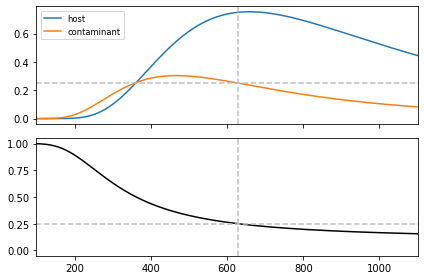

In [5]:
cn.plot(4400, 6200, 0.25, wlref=630)

### Transit light curve example

We use a `pytransit.UniformModel` so we don't need to think about the limb darkening.

The transit model needs an array of mid-exposure times (`times`), light curve indices (`lcids`), and passband indices (`pbids`). The `lcids` and `pbids` indices are needed since PyTransit models heterogeneous light curves consisting of  multiple passbands: `lcids` map each exposure to a single light curve, and `pbids` map each light curve to a single passband.

In [6]:
from pytransit import UniformModel
from pytransit.contamination import contaminate_light_curve

tm = UniformModel()

In [7]:
npt = 500
npb = len(cn.instrument.filters)
times = tile(linspace(0.88, 1.12, npt), npb)
lcids = repeat(arange(npb), npt)
pbids = arange(npb)

tm.set_data(times, lcids, pbids)
flux = tm.evaluate_ps(0.1, 1.0, 1.5, 4.0, 0.5*pi)

In [8]:
c = cn.contamination(0.5, 4400, 6200)
cflux = contaminate_light_curve(flux, c, pbids[lcids])

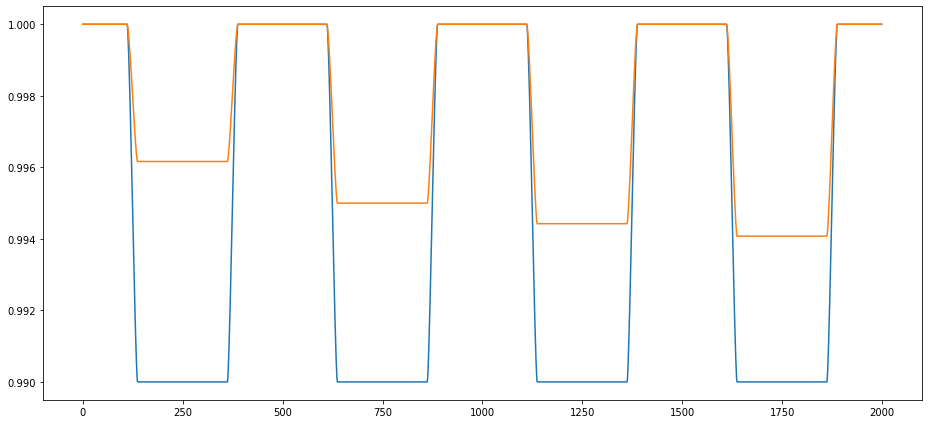

In [9]:
fig, ax = subplots(figsize=(13,6))
ax.plot(flux)
ax.plot(cflux)
fig.tight_layout()

---

<center>©2019 Hannu Parviainen</center>